In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import accuracy_score,classification_report

In [4]:
dataFrame=pd.read_csv("/home/hrugvedb/Desktop/hrugved/dataset/hd.csv")
df=dataFrame.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

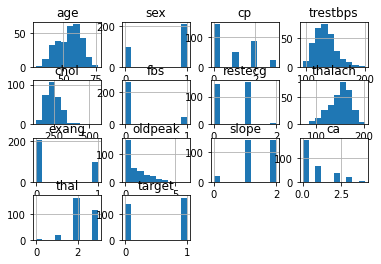

In [10]:
df.hist()

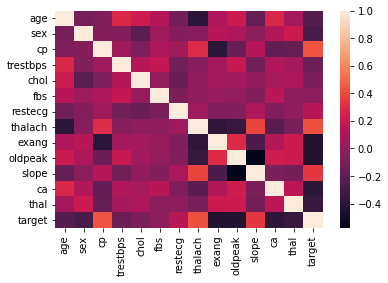

In [11]:
corr = df.corr()
#mask=np.triu(np.ones_like(df.corr()))
dataplot=sn.heatmap(df.corr())


Text(0.5, 0, 'heart disease present ')

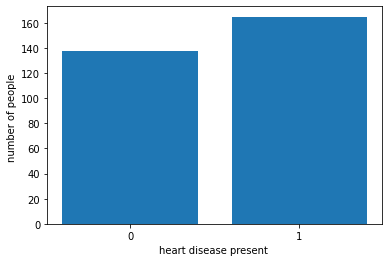

In [12]:
plt.bar(df['target'].unique(),df['target'].value_counts())
plt.xticks([0,1])
plt.ylabel("number of people ")
plt.xlabel("heart disease present ")

Text(0, 0.5, 'count of people')

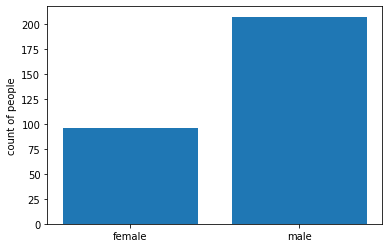

In [13]:
plt.bar(df['sex'].unique(),df['sex'].value_counts())
plt.xticks([0,1],['female','male'])
plt.ylabel('count of people')

In [54]:
y=df['exang']
X=df.drop(['ca'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

# knn implementation

In [80]:
K = []
training = []
test = []
scores = {}

for k in range(1, 10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score*100, test_score*100]


In [81]:
for keys,values in scores.items():
    print(keys,':',values)

1 : [100.0, 55.73770491803278]
2 : [81.81818181818183, 60.65573770491803]
3 : [78.51239669421489, 67.21311475409836]
4 : [78.51239669421489, 68.85245901639344]
5 : [76.85950413223141, 75.40983606557377]
6 : [73.55371900826447, 68.85245901639344]
7 : [73.14049586776859, 75.40983606557377]
8 : [71.07438016528926, 75.40983606557377]
9 : [72.31404958677686, 80.32786885245902]


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])
dict_values([[100.0, 55.73770491803278], [81.81818181818183, 60.65573770491803], [78.51239669421489, 67.21311475409836], [78.51239669421489, 68.85245901639344], [76.85950413223141, 75.40983606557377], [73.55371900826447, 68.85245901639344], [73.14049586776859, 75.40983606557377], [71.07438016528926, 75.40983606557377], [72.31404958677686, 80.32786885245902]])


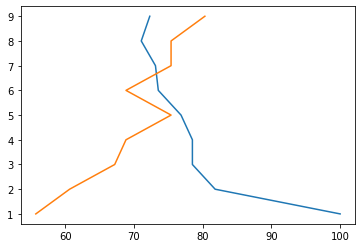

In [83]:
y=scores.keys()
print(y)
x=scores.values()
print(x)
plt.plot(x,y)

# decision tree implementation

In [98]:
y=df['target']
X=df.drop(['target'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.6,random_state=42)

In [108]:
rfc=RandomForestClassifier(n_estimators=20,random_state=42)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [109]:
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)


In [110]:
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.81

the classification report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        81
           1       0.84      0.81      0.82       101

    accuracy                           0.81       182
   macro avg       0.81      0.81      0.81       182
weighted avg       0.81      0.81      0.81       182

